In [7]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['cardboard','metal', 'paper', 'plastic', 'trash', 'glass']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/Users/dolly/Downloads/images_1' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data


loading... category : cardboard
loaded category:cardboard successfully
loading... category : metal
loaded category:metal successfully
loading... category : paper
loaded category:paper successfully
loading... category : plastic
loaded category:plastic successfully
loading... category : trash
loaded category:trash successfully
loading... category : glass
loaded category:glass successfully


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import os


In [9]:
def load_images_from_folder(folder, size=(128, 128)):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, size)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(gray_img.flatten())
            label = filename.split('_')[0]  # Assuming labels are part of the filename before an underscore
            labels.append(label)
    return np.array(images), np.array(labels)

# Update the folder path
folder_path = '/Users/dolly/Downloads/images_2'
images, labels = load_images_from_folder(folder_path)


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1508.59it/s]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = rf_classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        81
           1       0.59      0.56      0.57        82
           2       0.73      0.87      0.80       119
           3       0.78      0.61      0.68        97
           4       0.71      0.37      0.49        27
           5       0.57      0.65      0.61       100

    accuracy                           0.68       506
   macro avg       0.69      0.63      0.65       506
weighted avg       0.68      0.68      0.68       506

Confusion Matrix:
 [[ 60   3  13   1   0   4]
 [  3  46   7   7   3  16]
 [  4   4 104   1   0   6]
 [  9   7   5  59   0  17]
 [  3   5   2   1  10   6]
 [  3  13  11   7   1  65]]


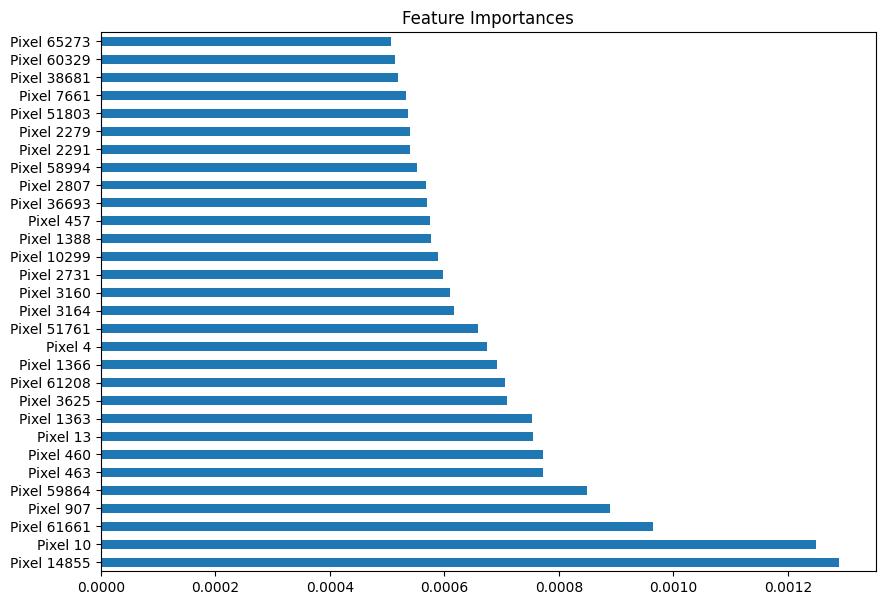

In [14]:
plt.figure(figsize=(10, 7))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=[f'Pixel {i}' for i in range(x_train.shape[1])])
feat_importances.nlargest(30).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Try different values for the number of trees (n_estimators)
n_values = range(1, 101)  # Adjust the range as needed
accuracy_scores = []

for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Plot the relationship between the number of trees and cross-validated accuracy
plt.plot(n_values, accuracy_scores)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Random Forest: Number of Trees vs. Cross-Validated Accuracy')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Check if y_test and y_pred are pandas Series and convert them to numpy arrays if needed
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy()

# Assuming 'x_test' has been reshaped or stored in the form of (num_samples, 150, 150, 3)
# Also assuming 'x_test' is a numpy array or a pandas DataFrame converted to numpy array

# Determine the number of images to display (min between 5 and the length of x_test)
num_images = min(5, len(x_test))

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))
for i in range(num_images):
    ax = axes[i] if num_images > 1 else axes
    # If x_test is a DataFrame, convert to numpy array and reshape
    if isinstance(x_test, pd.DataFrame):
        image_data = x_test.iloc[i].to_numpy().reshape(150, 150, 3)
    else:  # If x_test is a numpy array, just reshape
        image_data = x_test[i].reshape(150, 150, 3)
    
    ax.imshow(image_data)
    true_label = Categories[y_test[i]]
    predicted_label = Categories[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()